In [1]:
from warnings import filterwarnings
filterwarnings('ignore')
import pandas as pd 
import numpy as np 
import seaborn as sns 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

## Reading the Traning Dataset

In [2]:
df = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')


In [3]:
# Display top 5 rows in dataframe
display(df.head())

# Display the statistical information of the dataframe
display(df.describe())

# Display the information of the dataframe
display(df.info())

# Display the dimention of the dataframe
display('Shape of hte train data ', df.shape)
display(f'The train dataset has {df.shape[0]} rows and {df.shape[1]} columns')

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


None

'Shape of hte train data '

(165034, 14)

'The train dataset has 165034 rows and 14 columns'

In [4]:
# Checking if i have some null values
df.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

* This shows that the train dataset does not conatain any null values

In [5]:
df.duplicated().sum()

0

* This shows that train dataset does not contain any duplicate values
* So i'm gomimg to remove columns that i think i wiil not need 

In [6]:
# Showing all the available columns in the train dataset

df.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
class color:
    BOLD =  '\033[1m'
    END = '\033[0m'
def show_dtypes(x):
    for col in x.columns:
        print(color.BOLD +col+ color.END,"::",x[col].dtypes)

In [8]:
# Display data types in (train) data set

display('Dtypes of train')
print("---------------------")
print('============================')
display(show_dtypes(df))

'Dtypes of train'

---------------------
id :: int64
CustomerId :: int64
Surname :: object
CreditScore :: int64
Geography :: object
Gender :: object
Age :: float64
Tenure :: int64
Balance :: float64
NumOfProducts :: int64
HasCrCard :: float64
IsActiveMember :: float64
EstimatedSalary :: float64
Exited :: int64


None

In [9]:
from scipy import stats
def Tabulation(x):
    table = pd.DataFrame(x.dtypes, columns=['dtype'])
    table1 = pd.DataFrame(x.columns, columns=['Names'])
    table = table.reset_index()
    table = table.rename(columns = {'index':'Name'})
    table['No of Missing'] = x.isna().sum().values
    table['no of Uniques'] = x.nunique().values
    table['Percent of Missing'] = ((x.isna().sum().values)/(x.shape[0]))*100
    table['First Observation'] = x.loc[0].values
    table['Second Observation'] = x.loc[1].values
    table['Third Observation'] = x.loc[2].values
    for name in table['Name'].value_counts().index:
        table.loc[table['Name'] == name, 'Entropy'] = round(stats.entropy(x[name].value_counts(normalize=True),base=2),2)
    return table

In [10]:
Tabulation(df)

,Name,dtype,No of Missing,no of Uniques,Percent of Missing,First Observation,Second Observation,Third Observation,Entropy
0,id,int64,0,165034,0.0,0,1,2,17.33
1,CustomerId,int64,0,23221,0.0,15674932,15749177,15694510,13.50
2,Surname,object,0,2797,0.0,Okwudilichukwu,Okwudiliolisa,Hsueh,9.34
3,CreditScore,int64,0,457,0.0,668,627,678,8.06
4,Geography,object,0,3,0.0,France,France,France,1.41
5,Gender,object,0,2,0.0,Male,Male,Male,0.99
6,Age,float64,0,71,0.0,33.0,33.0,40.0,5.08
7,Tenure,int64,0,11,0.0,3,1,10,3.38
8,Balance,float64,0,30075,0.0,0.0,0.0,0.0,7.39
9,NumOfProducts,int64,0,4,0.0,2,2,2,1.13


In [11]:
def show_unique(x):
    class color:
        BOLD = '\033[1m'
        END = '\033[0m'
    for col in x.columns:
        print('Total Unique ' + color.BOLD +col+ color.END + " Values in Train data {}".format(x[col].nunique()))

In [12]:
show_unique(df)

Total Unique id Values in Train data 165034
Total Unique CustomerId Values in Train data 23221
Total Unique Surname Values in Train data 2797
Total Unique CreditScore Values in Train data 457
Total Unique Geography Values in Train data 3
Total Unique Gender Values in Train data 2
Total Unique Age Values in Train data 71
Total Unique Tenure Values in Train data 11
Total Unique Balance Values in Train data 30075
Total Unique NumOfProducts Values in Train data 4
Total Unique HasCrCard Values in Train data 2
Total Unique IsActiveMember Values in Train data 2
Total Unique EstimatedSalary Values in Train data 55298
Total Unique Exited Values in Train data 2


* now i am going to seperate dependent(x) and target(Machine Failure) from train dataset

In [13]:
x = df.drop(columns=['id','Exited','Surname'])
y = df[['Exited']]

In [14]:
x.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15674932,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97
1,15749177,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50
2,15694510,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69
3,15741417,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88
4,15766172,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83


In [15]:
y.head()

,Exited
0,0
1,0
2,0
3,0
4,0


## Seperate cat and con features for x

In [16]:
cat = list(x.columns[x.dtypes == 'object'])
con = list(x.columns[x.dtypes != 'object'])

In [17]:
cat

['Geography', 'Gender']

In [18]:
con

['CustomerId',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

* Now i am going to create a feature selection pipeline to enhance the overall model performance 

In [19]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                        ('scaler', StandardScaler())])

cat_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                           ('ordinal', OrdinalEncoder())])

pre = ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)]).set_output(transform='pandas')

In [20]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['CustomerId', 'CreditScore', 'Age', 'Tenure',
                                  'Balance', 'NumOfProducts', 'HasCrCard',
                                  'IsActiveMember', 'EstimatedSalary']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinal',
                                                  OrdinalEncoder())]),
                                 ['Geography', 'Gender'])])

In [21]:
x_pre = pre.fit_transform(x)
x_pre.head()

,num__CustomerId,num__CreditScore,num__Age,num__Tenure,num__Balance,num__NumOfProducts,num__HasCrCard,num__IsActiveMember,num__EstimatedSalary,cat__Geography,cat__Gender
0,-0.239126,0.144135,-0.578074,-0.719973,-0.883163,0.814298,0.571263,-0.99555,1.369486,0.0,1.0
1,0.800755,-0.367706,-0.578074,-1.432694,-0.883163,0.814298,0.571263,1.00447,-1.254085,0.0,1.0
2,0.035085,0.268974,0.211354,1.774548,-0.883163,0.814298,0.571263,-0.99555,1.437422,0.0,1.0
3,0.692068,-0.941966,-0.465299,-1.076334,1.486918,-1.013348,0.571263,1.00447,-0.557018,0.0,1.0
4,1.038788,0.743362,-0.578074,-0.007253,-0.883163,0.814298,0.571263,1.00447,-1.938770,2.0,1.0


## Perform feature selection with mutual information scores

In [22]:
mi = mutual_info_classif(x_pre, y)
mi

array([0.00321442, 0.00506182, 0.08342856, 0.00400311, 0.02135756,
       0.10153476, 0.01154653, 0.03677855, 0.00667261, 0.02575133,
       0.03220328])

In [23]:
mi = pd.Series(mi)
mi.index = x_pre.columns
mi = mi.sort_values(ascending=False)
mi

num__NumOfProducts      0.101535
num__Age                0.083429
num__IsActiveMember     0.036779
cat__Gender             0.032203
cat__Geography          0.025751
num__Balance            0.021358
num__HasCrCard          0.011547
num__EstimatedSalary    0.006673
num__CreditScore        0.005062
num__Tenure             0.004003
num__CustomerId         0.003214
dtype: float64

<Axes: title={'center': 'mutual information'}>

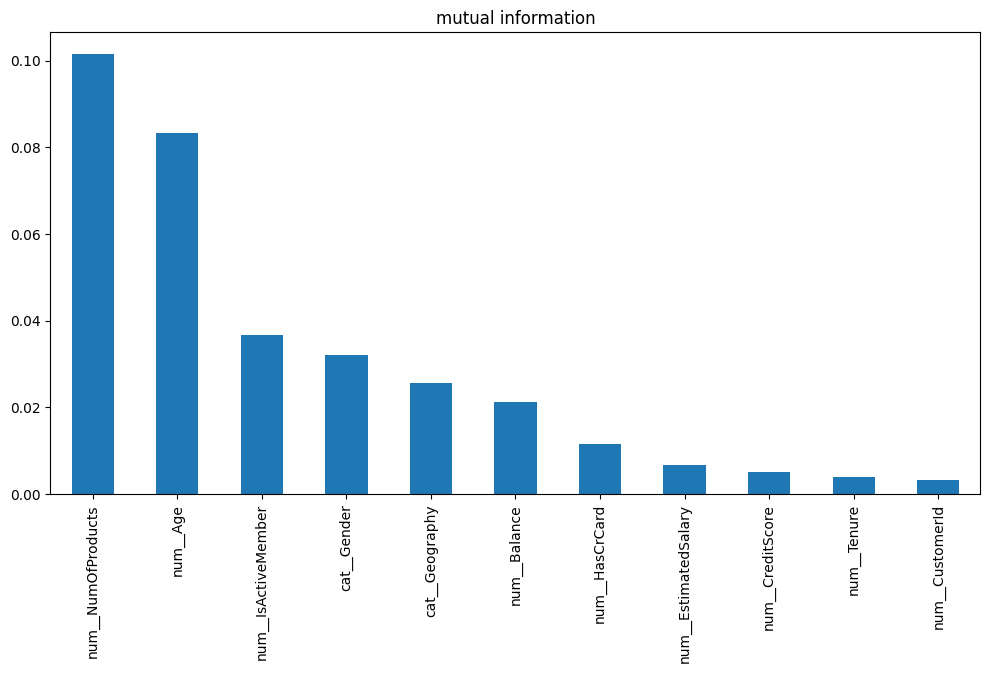

In [24]:
mi.plot(kind='bar', title='mutual information', figsize=(12,6))

We can see

1. NumOfProducts
2. Age
3. IsActiveMember
4. Gender
5. Geography
6. Balance

are the top 6 features which are dependent with Exited feature

* Create a Final selection pipeline using OneHotEncoder to enhance the overall model performance 

In [25]:
num_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())])

cat_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                            ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

pre1 = ColumnTransformer([('num', num_pipe1, con),
                          ('cat', cat_pipe1, cat)]).set_output(transform='pandas')

In [26]:
x_pre1 = pre1.fit_transform(x)
x_pre1.head()

,num__CustomerId,num__CreditScore,num__Age,num__Tenure,num__Balance,num__NumOfProducts,num__HasCrCard,num__IsActiveMember,num__EstimatedSalary,cat__Geography_France,cat__Geography_Germany,cat__Geography_Spain,cat__Gender_Female,cat__Gender_Male
0,-0.239126,0.144135,-0.578074,-0.719973,-0.883163,0.814298,0.571263,-0.99555,1.369486,1.0,0.0,0.0,0.0,1.0
1,0.800755,-0.367706,-0.578074,-1.432694,-0.883163,0.814298,0.571263,1.00447,-1.254085,1.0,0.0,0.0,0.0,1.0
2,0.035085,0.268974,0.211354,1.774548,-0.883163,0.814298,0.571263,-0.99555,1.437422,1.0,0.0,0.0,0.0,1.0
3,0.692068,-0.941966,-0.465299,-1.076334,1.486918,-1.013348,0.571263,1.00447,-0.557018,1.0,0.0,0.0,0.0,1.0
4,1.038788,0.743362,-0.578074,-0.007253,-0.883163,0.814298,0.571263,1.00447,-1.938770,0.0,0.0,1.0,0.0,1.0


## Perform train test split for x

In [27]:
xtrain, xtest, ytrain, ytest = train_test_split(x_pre, y, test_size = 0.2, random_state = 42)

In [28]:
xtrain.head()

,num__CustomerId,num__CreditScore,num__Age,num__Tenure,num__Balance,num__NumOfProducts,num__HasCrCard,num__IsActiveMember,num__EstimatedSalary,cat__Geography,cat__Gender
149380,1.233697,0.281458,0.324129,1.418187,-0.883163,0.814298,0.571263,1.00447,-0.179228,0.0,1.0
164766,-0.171505,0.805782,0.888007,1.418187,0.959705,0.814298,0.571263,-0.99555,-0.191360,0.0,1.0
155569,-0.760908,-1.316483,-0.352523,-0.007253,-0.883163,-1.013348,0.571263,-0.99555,0.851410,0.0,1.0
124304,0.513855,1.080428,-0.803625,-0.719973,0.038014,0.814298,0.571263,1.00447,-0.102329,2.0,0.0
108008,-1.097124,0.231522,-1.141952,-1.076334,-0.883163,0.814298,0.571263,-0.99555,0.428215,0.0,1.0


In [29]:
xtrain.shape

(132027, 11)

In [30]:
xtest.head()

,num__CustomerId,num__CreditScore,num__Age,num__Tenure,num__Balance,num__NumOfProducts,num__HasCrCard,num__IsActiveMember,num__EstimatedSalary,cat__Geography,cat__Gender
33042,0.845546,1.767043,-0.803625,1.061827,0.741797,-1.013348,0.571263,-0.99555,-0.656106,0.0,0.0
36330,0.709771,-0.342738,-1.367503,0.349107,-0.883163,0.814298,0.571263,-0.99555,-1.479022,0.0,1.0
59446,0.537721,-1.141708,0.098578,0.705467,0.950137,2.641943,0.571263,-0.99555,-0.865378,0.0,1.0
92278,1.559716,-0.043124,1.902986,-1.076334,0.235376,-1.013348,-1.750507,-0.99555,-0.998696,2.0,1.0
146750,0.605972,-1.241580,-0.803625,0.349107,0.813758,-1.013348,0.571263,-0.99555,-0.422905,0.0,0.0


In [31]:
xtest.shape

(33007, 11)

In [32]:
from sklearn.preprocessing import MinMaxScaler

def scale(x):
    scaler = MinMaxScaler()
    scaler.fit(x)
    return x


## Model 1 : Random forest classiifer with top 6 features

## Algo Evaluation

In [33]:
from catboost import CatBoostError
from catboost import CatBoostClassifier


In [34]:
dict = {
       'Random Forest' : RandomForestClassifier(),
       'XGB' : XGBClassifier(),
       'CatBoost' : CatBoostClassifier()
       
      }

In [35]:
dict.items()

dict_items([('Random Forest', RandomForestClassifier()), ('XGB', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)), ('CatBoost', <catboost.core.CatBoostClassifier object at 0x7d08776f3760>)])

In [36]:
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, RocCurveDisplay
from sklearn.model_selection import cross_val_score

In [37]:
for name, model in dict.items():
    # Fit the model
    model.fit(xtrain, ytrain)
    # Predict the results for train and test
    ypred_tr = model.predict(xtrain)
    ypred_ts = model.predict(xtest)
    # Calculate f1 Score in train and test
    f1_tr = f1_score(ytrain, ypred_tr)
    f1_ts = f1_score(ytest, ypred_ts)
    # Calculate 5 fold cross validated result
    scores = cross_val_score(model, xtrain, ytrain, cv =5, scoring='f1_macro')
    f1_cv = scores.mean()
    # Print the results for each model
    print(f'Model Name : {name}\n')
    print(f'Training F1 : {f1_tr : .4f}')
    print(f'Testing F1 : {f1_ts : .4f}')
    print(f'F1 Cross Validated : {f1_cv : .4f}')
    print('\n==================================================\n')

Model Name : Random Forest

Training F1 :  0.9998
Testing F1 :  0.6194
F1 Cross Validated :  0.7673


Model Name : XGB

Training F1 :  0.6851
Testing F1 :  0.6380
F1 Cross Validated :  0.7742


Learning rate set to 0.082881
0:	learn: 0.6205700	total: 76.7ms	remaining: 1m 16s
1:	learn: 0.5614339	total: 98.7ms	remaining: 49.3s
2:	learn: 0.5145631	total: 122ms	remaining: 40.4s
3:	learn: 0.4807554	total: 144ms	remaining: 35.9s
4:	learn: 0.4516544	total: 169ms	remaining: 33.6s
5:	learn: 0.4299675	total: 192ms	remaining: 31.8s
6:	learn: 0.4115935	total: 215ms	remaining: 30.4s
7:	learn: 0.3976904	total: 236ms	remaining: 29.3s
8:	learn: 0.3865763	total: 260ms	remaining: 28.6s
9:	learn: 0.3771406	total: 283ms	remaining: 28s
10:	learn: 0.3694976	total: 304ms	remaining: 27.3s
11:	learn: 0.3623988	total: 325ms	remaining: 26.8s
12:	learn: 0.3576474	total: 344ms	remaining: 26.1s
13:	learn: 0.3531913	total: 364ms	remaining: 25.7s
14:	learn: 0.3496311	total: 384ms	remaining: 25.2s
15:	learn: 0.3469723


# Select he CatBoost Model as a final model

In [38]:
best_model = CatBoostClassifier()
#best_model = RandomForestClassifier()
best_model.fit(xtrain, ytrain)

Learning rate set to 0.082881
0:	learn: 0.6205700	total: 22ms	remaining: 22s
1:	learn: 0.5614339	total: 43.5ms	remaining: 21.7s
2:	learn: 0.5145631	total: 65.6ms	remaining: 21.8s
3:	learn: 0.4807554	total: 86.6ms	remaining: 21.6s
4:	learn: 0.4516544	total: 108ms	remaining: 21.6s
5:	learn: 0.4299675	total: 129ms	remaining: 21.4s
6:	learn: 0.4115935	total: 150ms	remaining: 21.3s
7:	learn: 0.3976904	total: 170ms	remaining: 21.1s
8:	learn: 0.3865763	total: 193ms	remaining: 21.3s
9:	learn: 0.3771406	total: 214ms	remaining: 21.2s
10:	learn: 0.3694976	total: 234ms	remaining: 21s
11:	learn: 0.3623988	total: 256ms	remaining: 21s
12:	learn: 0.3576474	total: 275ms	remaining: 20.9s
13:	learn: 0.3531913	total: 295ms	remaining: 20.8s
14:	learn: 0.3496311	total: 315ms	remaining: 20.7s
15:	learn: 0.3469723	total: 336ms	remaining: 20.6s
16:	learn: 0.3435550	total: 357ms	remaining: 20.7s
17:	learn: 0.3412314	total: 378ms	remaining: 20.6s
18:	learn: 0.3394843	total: 401ms	remaining: 20.7s
19:	learn: 0.33

In [39]:
best_model.score(xtrain, ytrain)

0.8796609784362289

In [40]:
best_model.score(xtest, ytest)

0.8674220619868512

* Predict the result for train and test

In [41]:
# Make Predictin on train data
ypred_tr = best_model.predict(xtrain)

# Make prediciton on the test data
ypred_ts = best_model.predict(xtest)

In [42]:
ypred_tr[0:5]

array([0, 0, 0, 0, 0])

In [43]:
ytrain.head()

,Exited
149380,0
164766,0
155569,0
124304,0
108008,0


In [44]:
ypred_ts[0:5]

array([0, 0, 1, 1, 0])

In [45]:
ytest.head()

,Exited
33042,0
36330,0
59446,1
92278,0
146750,0


# Confusion Matrix

In [46]:
best_model.classes_

array([0, 1])

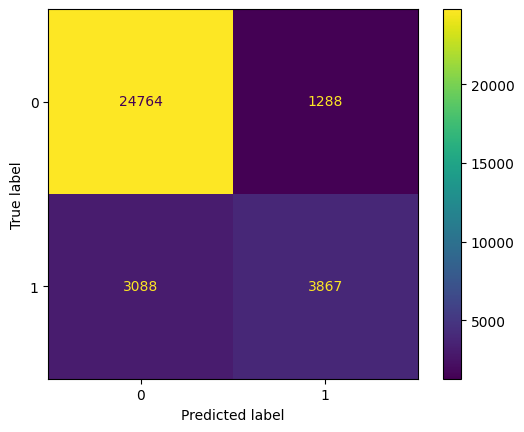

In [47]:
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels = best_model.classes_)
cfd.plot()

# Print the classification report

In [48]:
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     26052
           1       0.75      0.56      0.64      6955

    accuracy                           0.87     33007
   macro avg       0.82      0.75      0.78     33007
weighted avg       0.86      0.87      0.86     33007



# ROC AUC Score train data

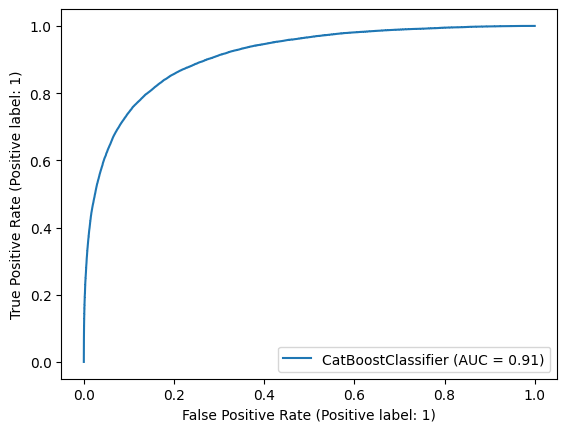

In [49]:
RocCurveDisplay.from_estimator(best_model, xtrain, ytrain)

# ROC AUC Score for test data 

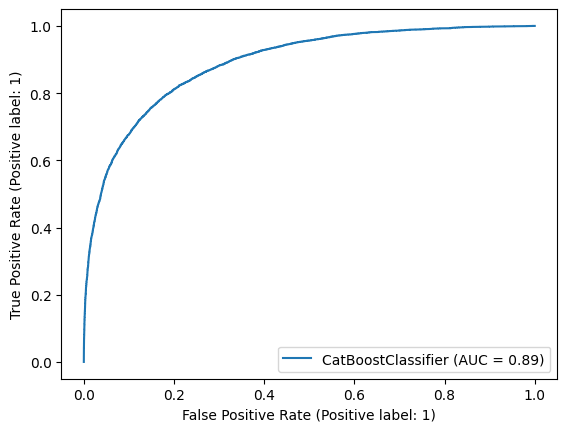

In [50]:
RocCurveDisplay.from_estimator(best_model, xtest, ytest)

# Above model has f1_macro score of 0.89 > 0.80, use this model for any predictions

## Now i am going to Load Sample test dataset to check performance of model 

In [51]:
test_df = pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')

In [52]:
# Display top 5 rows in dataframe
display(test_df.head())

# Display the statistical information of the dataframe
display(test_df.describe())

# Display the information of the dataframe
display(test_df.info())

# Display the dimention of the dataframe
display('Shape of train data ', test_df.shape)
display(f'The test data set has {test_df.shape[0]} rows and {test_df.shape[1]} columns')

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,110023.000000,1.100230e+05,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000
mean,220045.000000,1.569210e+07,656.530789,38.122205,4.996637,55333.611354,1.553321,0.753043,0.495233,112315.147765
std,31761.048671,7.168499e+04,80.315415,8.861550,2.806148,62788.519675,0.544714,0.431244,0.499980,50277.048244
min,165034.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,192539.500000,1.563286e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74440.325000
50%,220045.000000,1.569018e+07,660.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117832.230000
75%,247550.500000,1.575693e+07,710.000000,42.000000,7.000000,120145.605000,2.000000,1.000000,1.000000,154631.350000
max,275056.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  object 
 5   Gender           110023 non-null  object 
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 10.9+ MB


None

'Shape of train data '

(110023, 13)

'The test data set has 110023 rows and 13 columns'

In [53]:
# Checking if i have some null values
test_df.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [54]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['CustomerId', 'CreditScore', 'Age', 'Tenure',
                                  'Balance', 'NumOfProducts', 'HasCrCard',
                                  'IsActiveMember', 'EstimatedSalary']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinal',
                                                  OrdinalEncoder())]),
                                 ['Geography', 'Gender'])])

# Apply pre.transform on test_df

In [55]:
test_df_pre = pre.transform(test_df)
test_df_pre

,num__CustomerId,num__CreditScore,num__Age,num__Tenure,num__Balance,num__NumOfProducts,num__HasCrCard,num__IsActiveMember,num__EstimatedSalary,cat__Geography,cat__Gender
0,1.146999,-0.879546,-1.705829,-1.076334,-0.883163,0.814298,-1.750507,1.00447,0.962404,0.0,0.0
1,1.266331,0.331393,0.888007,-1.076334,-0.883163,-1.013348,0.571263,-0.99555,-0.795852,0.0,0.0
2,1.612309,-0.005672,-0.465299,0.705467,-0.883163,0.814298,0.571263,-0.99555,0.523083,0.0,0.0
3,1.637310,0.306425,-0.239748,1.061827,-0.883163,-1.013348,0.571263,-0.99555,0.026977,0.0,1.0
4,-1.186189,1.192783,-0.014197,1.774548,1.047249,-1.013348,0.571263,-0.99555,0.533997,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
110018,-0.418978,-1.079289,-1.029176,0.705467,0.965046,-1.013348,0.571263,1.00447,0.706122,2.0,1.0
110019,1.150290,-1.016869,-0.239748,-0.363613,1.950961,-1.013348,0.571263,1.00447,-1.399669,0.0,0.0
110020,0.510535,0.693427,-0.803625,-1.076334,-0.883163,0.814298,0.571263,-0.99555,-1.914541,0.0,1.0
110021,-0.062523,0.655975,-0.690850,-0.719973,-0.883163,-1.013348,0.571263,1.00447,0.919452,0.0,0.0


## Get predicion probability

In [56]:
probs = best_model.predict_proba(test_df_pre)[:,1]
probs

array([0.02159724, 0.85200789, 0.01421639, ..., 0.02548165, 0.14993146,
       0.1696743 ])

## Save the above results in dataframe format

In [57]:
df_submission = test_df[['id']]
df_submission

,id
0,165034
1,165035
2,165036
3,165037
4,165038
...,...
110018,275052
110019,275053
110020,275054
110021,275055


In [58]:
df_submission['Exited'] = probs

In [59]:
df_submission

,id,Exited
0,165034,0.021597
1,165035,0.852008
2,165036,0.014216
3,165037,0.196871
4,165038,0.348048
...,...,...
110018,275052,0.031056
110019,275053,0.141513
110020,275054,0.025482
110021,275055,0.149931


## Save final result in form of csv

In [60]:
df_submission.to_csv('submission.csv', index = False)
df_submission

,id,Exited
0,165034,0.021597
1,165035,0.852008
2,165036,0.014216
3,165037,0.196871
4,165038,0.348048
...,...,...
110018,275052,0.031056
110019,275053,0.141513
110020,275054,0.025482
110021,275055,0.149931
